In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os

print(os.getcwd())

/Users/javiergalindos/OneDrive/OneDrive - Universidad Politécnica de Madrid/Documentos/MSc DM/2ºDM/Computer Vision/Code/its8030-2021-hw2/Code


In [4]:
os.chdir("/Users/javiergalindos/OneDrive/OneDrive - Universidad Politécnica de Madrid/Documentos/MSc DM/2ºDM/Computer Vision/Code/its8030-2021-hw2")

(422, 265)


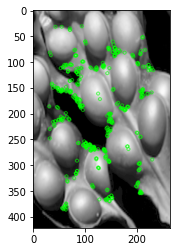

(<matplotlib.image.AxesImage at 0x7f9852806970>, None)

In [5]:
### checking etalon features

img = cv2.imread('Etalons/Fucus/etalon_fucus_5.png',0)
print(img.shape)


# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img,None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()

In [6]:
# Read the query image as query_img
# and train image This query image
# is what you need to find in train image
# Save it in the same directory
# with the name image.jpg 
query_img_bw = cv2.imread('Etalons/Fucus/etalon_fucus_5.png',0)
#train_img_bw = cv2.imread('Processed images/Fucus/Fucus_0.jpg',0)
train_img_bw = cv2.imread('Processed images/Zostera marina/zostera_marina_3.jpg',0)
# train_img_bw = cv2.imread('Processed images/Fucus/Fucus_13.jpg',0)

print(query_img_bw.shape)
  
# Convert it to grayscale
# query_img_bw = cv2.cvtColor(query_img,cv2.COLOR_BGR2GRAY)
# train_img_bw = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY)
  
# Initialize the ORB detector algorithm
orb = cv2.ORB_create()
  
# Now detect the keypoints and compute
# the descriptors for the query image
# and train image
queryKeypoints, queryDescriptors = orb.detectAndCompute(query_img_bw,None)
trainKeypoints, trainDescriptors = orb.detectAndCompute(train_img_bw,None)
 
# Initialize the Matcher for matching
# the keypoints and then match the
# keypoints

#matcher = cv2.DescriptorMatcher_create('BruteForce-L1') #BruteForce = L2, BruteForce-L1
matcher = cv2.BFMatcher(cv2.NORMCONV_FILTER)
matches = matcher.match(queryDescriptors,trainDescriptors)
  

matches = sorted(matches, key = lambda x:x.distance)
# draw the matches to the final image
# containing both the images the drawMatches()
# function takes both images and keypoints
# and outputs the matched query image with
# its train image
final_img = cv2.drawMatches(query_img_bw, queryKeypoints,
train_img_bw, trainKeypoints, matches[:50],None)
  
final_img = cv2.resize(final_img, (1000,650))
 
# Show the final image
cv2.imshow("Matches", final_img)
cv2.waitKey(0)

(422, 265)


27

In [18]:
### Getting a score


# This time, we will use BFMatcher.knnMatch() to get k best matches. 
# In this example, we will take k=2 so that we can apply ratio test 
# explained by D.Lowe in his paper. 

import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

os.chdir("g:\\My Drive\\1. EIT Digital master\\Estland\\Semester 1\\Computer vision\\its8030-2021-hw2\\")

def FDBaseline(classtype_etalon = 'Fucus', classtype_train = 'Fucus', lowe_ratio = 0.7, method = 'ORB'):

    etalon_dir_path = './etalons/'
    process_img_path = './Processed images/'

    etalon_dir_path = os.path.join(etalon_dir_path, classtype_etalon)
    process_img_path = os.path.join(process_img_path, classtype_train)

    results = np.zeros(shape=(len(os.listdir(process_img_path)), len(os.listdir(etalon_dir_path))))

    row = 0
    for img_path in os.listdir(process_img_path):
        
        folder_path_img= os.path.join(process_img_path, img_path)
        img = cv2.imread(folder_path_img,0)

        col = 0
        for etalon_path in os.listdir(etalon_dir_path):
            
            etalon_path_img= os.path.join(etalon_dir_path, etalon_path)
            etalon = cv2.imread(etalon_path_img,0)

            if method == 'ORB':
                finder = cv2.ORB_create()

            # find the keypoints and descriptors with SIFT
            kp1, des1 = finder.detectAndCompute(etalon,None)
            kp2, des2 = finder.detectAndCompute(img,None)

            # BFMatcher with default params
            bf = cv2.BFMatcher()
            matches = bf.knnMatch(des1,des2, k=2)

            # Apply ratio test
            good = []

            good = [[m] for m, n in matches if m.distance < lowe_ratio*n.distance]

            # msg1 = 'using %s with lowe_ratio %.2f' % (method, lowe_ratio)
            # msg2 = 'there are %d good matches' % (len(good))

            # img3 = cv2.drawMatchesKnn(etalon,kp1,img,kp2,good, None, flags=2)

            # font = cv2.FONT_HERSHEY_SIMPLEX

            results[row][col] = len(good)
            # print(msg1)
            # print(msg2)
            # cv2.putText(img3,msg1,(10, 250), font, 0.5,(255,255,255),1,cv2.LINE_AA)
            # cv2.putText(img3,msg2,(10, 270), font, 0.5,(255,255,255),1,cv2.LINE_AA)
            # fname = 'output_%s_%.2f.png' % (method, lowe_ratio)
            # cv2.imwrite(fname, img3)
            col += 1
            #plt.imshow(img3),plt.show()
        row += 1
    return results

In [32]:
results = FDBaseline(classtype_etalon = 'Fucus', classtype_train = 'Fucus', lowe_ratio = 0.7, method = 'ORB')
print(np.amax(results,1))
print(np.mean(np.amax(results,1)))

[ 2. 23.  1.  1.  2.  1.  1.  2.  5.  1.  1.  2.  1.  2.  1.  2.  0.  2.
  2.  1.  1.  1.  0.  1.  1.  1.  0.  0.  0.  0.  1.  3.  1.  0.  2.  1.
  1.  2.  1.  0.  0.  1.  9.  1.  1.  1.  1.  3.  0.  1.  1.  0.  1.  1.
  1.]
1.6727272727272726


In [33]:
results

array([[ 2.,  0.,  0.,  0.],
       [ 1., 23.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 1.,  0.,  2.,  1.],
       [ 0.,  1.,  1.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  2.,  1.],
       [ 5.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 2.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  2.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 2.,  0.,  2.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 2.,  1.,  1.,  0.],
       [ 2.,  0.,  0.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 0.,  1.,  1.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  1.,  0.,  1.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 3.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 2.,  

In [36]:
#how many good classifications do we consider to be good?
our_threshold = 2

max_vals = (np.amax(results,1))
good_classifc = np.count_nonzero((max_vals > our_threshold))

ratio = round(good_classifc / results.shape[0],2)
ratio

0.09

In [67]:
def FDpredict(img_select = './Processed images/Fucus/Fucus_0.jpg', lowe_ratio = 0.7, method = 'ORB' ):
    etalon_dir_path = './Etalons/'
    im_results = np.zeros(shape=(1,10)) #10 because we dont know the exact amount of etalons
    final_results = np.zeros(shape=(1,3))

    img = cv2.imread(img_select,0)
    col_final = 0
    for etalon_folder in os.listdir(etalon_dir_path):
        col_im = 0

        class_etalon = os.path.join(etalon_dir_path, etalon_folder)
        
        for etalon_path in os.listdir(class_etalon):
            
            etalon_path_img= os.path.join(class_etalon, etalon_path)
            etalon = cv2.imread(etalon_path_img,0)


            if method == 'ORB':
                finder = cv2.ORB_create()

            # find the keypoints and descriptors with SIFT
            kp1, des1 = finder.detectAndCompute(etalon,None)
            kp2, des2 = finder.detectAndCompute(img,None)

            # BFMatcher with default params
            bf = cv2.BFMatcher()
            matches = bf.knnMatch(des1,des2, k=2)

            # Apply ratio test
            good = []

            good = [[m] for m, n in matches if m.distance < lowe_ratio*n.distance]

            # msg1 = 'using %s with lowe_ratio %.2f' % (method, lowe_ratio)
            # msg2 = 'there are %d good matches' % (len(good))

            # img3 = cv2.drawMatchesKnn(etalon,kp1,img,kp2,good, None, flags=2)

            # font = cv2.FONT_HERSHEY_SIMPLEX

            im_results[0][col_im] = len(good)
            # print(msg1)
            # print(msg2)
            # cv2.putText(img3,msg1,(10, 250), font, 0.5,(255,255,255),1,cv2.LINE_AA)
            # cv2.putText(img3,msg2,(10, 270), font, 0.5,(255,255,255),1,cv2.LINE_AA)
            # fname = 'output_%s_%.2f.png' % (method, lowe_ratio)
            # cv2.imwrite(fname, img3)
            col_im += 1
            #plt.imshow(img3),plt.show()
        final_results[0][col_final] = np.sum(im_results)/len(os.listdir(etalon_dir_path)) #get average so that it is not biased with number of etalons
        col_final += 1
    return final_results

In [70]:
os.chdir("g:\\My Drive\\1. EIT Digital master\\Estland\\Semester 1\\Computer vision\\its8030-2021-hw2\\")


img = './Processed images/Fucus/Fucus_13.jpg'
results = FDpredict(img_select = img, lowe_ratio = 0.7, method = 'ORB' )
print(results)

if(np.argmax(results) == 0):
    print('Predicted %s as: Fucus' %img )


elif(np.argmax(results) == 1):
    print('Predicted %s as: Furcellaria lumbricalis' %img )

else:
    print('Predicted %s as: Zostera marina' %img )

[[1.         1.33333333 1.        ]]
Predicted ./Processed images/Fucus/Fucus_13.jpg as: Furcellaria lumbricalis
